## Observations and Insights 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.

# make a list of Mouse IDs
mice_names=merge_df["Mouse ID"]

# count the number of unique mice
num_mice=len(pd.unique(mice_names))

#output
print("There are",num_mice,"mice in the original data set")


There are 249 mice in the original data set


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# created a column for the name of the mouse to access it after groupby
merge_df["ID"] = merge_df["Mouse ID"]

# group the data by name
by_name = merge_df.groupby(['Mouse ID'])

# calculate the unique timepoints per mouse
u_time = by_name['Timepoint'].nunique()

# calculate the total timepoints per mouse
t_time = by_name['Timepoint'].count()

# caluclate the duplicate timepoints per mouse
duplicates = t_time-u_time

# put the mice with bad data into a dataframe
mouse_df = pd.DataFrame({"Unique Timepoints": u_time,
                       "Total Timepoints": t_time,
                       "Errors":duplicates
                        })

# create a dataframe of the bad data
errors = mouse_df.loc[mouse_df["Errors"]>0,:]

# create a list of Mouse IDs who have bad data
names=errors.index

# look at the list
names



Index(['g989'], dtype='object', name='Mouse ID')

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# create a dataframe indexed on the Mouse ID
ID_df = merge_df.set_index("Mouse ID")

# create an empty dataframe for the bad data
bad_data=[]

# loop through our list of Mice with bad data and append their data into the dataframe
for i in names:
    bad_data.append(ID_df.loc[i, :])

# output data   
bad_data


[         Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 Mouse ID                                                           
 g989         Propriva  Female          21          26          0   
 g989         Propriva  Female          21          26          0   
 g989         Propriva  Female          21          26          5   
 g989         Propriva  Female          21          26          5   
 g989         Propriva  Female          21          26         10   
 g989         Propriva  Female          21          26         10   
 g989         Propriva  Female          21          26         15   
 g989         Propriva  Female          21          26         15   
 g989         Propriva  Female          21          26         20   
 g989         Propriva  Female          21          26         20   
 g989         Propriva  Female          21          26         25   
 g989         Propriva  Female          21          26         30   
 g989         Propriva  Female    

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# create a clean dataframe by dropping the mice from the list of Mice with bad data
for i in names:
    clean_df=merge_df[merge_df["Mouse ID"]!=i]


In [6]:
# Checking the number of mice in the clean DataFrame.

# make a list of Mouse IDs from the cleaned data
c_mice_names=clean_df["Mouse ID"]

# count the number of unique mice in the cleaned data
c_num_mice=len(pd.unique(c_mice_names))

#output
print("There are",c_num_mice,"mice in the cleaned data set")




There are 248 mice in the cleaned data set


## Summary Statistics

In [7]:
merge_df.columns


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'ID'],
      dtype='object')

In [8]:

# group the data by Drug Regimen
drug_group = merge_df.groupby(["Drug Regimen"])

# calculate the number of tests run
exp_ct = drug_group["Timepoint"].count()

# calculate the mean of the Tumor Volume by Drug
tum_mean = drug_group["Tumor Volume (mm3)"].mean()

# calculate the median of the Tumor Volume by Drug
tum_median = drug_group["Tumor Volume (mm3)"].median()

# calculate the variance of the Tumor Volume by Drug
tum_var = drug_group["Tumor Volume (mm3)"].var()

# calculate the standard deviation of the Tumor Volume by Drug
tum_std = drug_group["Tumor Volume (mm3)"].std()

# calculate the standard error of the mean of the Tumor Volume by Drug
tum_SEM = drug_group["Tumor Volume (mm3)"].sem()

# created a summary dataframe
drug_df = pd.DataFrame({"Timepoints taken":exp_ct,
                                "Tumor Volume Mean": tum_mean, 
                                "Tumor Volume Median": tum_median,
                                "Tumor Volume Variance" :tum_var, 
                                "Tumor Volume Std Dev" :tum_std,
                                "Tumor Volume SEM" :tum_SEM})


# display
drug_df


,Timepoints taken,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


# group the data by Drug Regimen
drug_group = merge_df.groupby(["Drug Regimen"])

# calculate the number of tests run
exp_ct = drug_group["Timepoint"].count()

# calculate the mean of the Tumor Volume by Drug
tum_mean = drug_group["Tumor Volume (mm3)"].mean()

# calculate the median of the Tumor Volume by Drug
tum_median = drug_group["Tumor Volume (mm3)"].median()

# calculate the variance of the Tumor Volume by Drug
tum_var = drug_group["Tumor Volume (mm3)"].var()

# calculate the standard deviation of the Tumor Volume by Drug
tum_std = drug_group["Tumor Volume (mm3)"].std()

# calculate the standard error of the mean of the Tumor Volume by Drug
tum_SEM = drug_group["Tumor Volume (mm3)"].sem()

# created a summary dataframe
drug_df = pd.DataFrame({"Timepoints taken":exp_ct,
                                "Tumor Volume Mean": tum_mean, 
                                "Tumor Volume Median": tum_median,
                                "Tumor Volume Variance" :tum_var, 
                                "Tumor Volume Std Dev" :tum_std,
                                "Tumor Volume SEM" :tum_SEM})


# display
drug_df


,Timepoints taken,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


drug_df.aggregate(['mean'])





,Timepoints taken,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
mean,189.3,50.976144,49.94296,47.708346,6.809671,0.499641


In [ ]:
unique_mice


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice in each Drug Regimen')

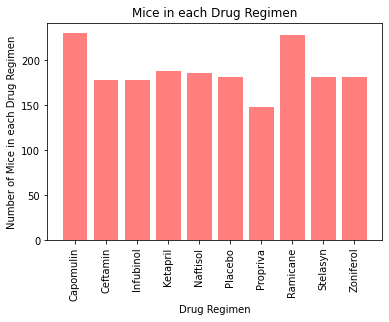

In [80]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# group the mice by drug from the cleaned data
mice = clean_df.groupby(["Drug Regimen"])

# grab the unique mice names
unique_mice = mice["Mouse ID"].unique()



# set series empty to append
mice_pd =[]

#  count the unique mice per drug regimen
for i in unique_mice:
    mice_pd.append(len(i))
    
# create a datafram of unique mice per drug without duplicates for graphing
#drug_mice = pd.DataFrame({"Drug Regimen":unique_mice.index,
 #                               "Number of Mice": mice_pd})

# create a datafram of unique mice per drug without duplicates for graphing
drug_mice = pd.DataFrame({"Drug Regimen":unique_mice.index,
                                "Number of Mice": mice["Mouse ID"].count()})



# plot a bar graph with Drug Regimen vs Number of Mice
plt.bar(drug_mice["Drug Regimen"], drug_mice["Number of Mice"], color='r', alpha=0.5, align="center")

# set the x ticks to the drug category spots
tick_locations = [value for value in drug_mice["Drug Regimen"]]

# name the x labels after the drug regimens
plt.xticks(tick_locations,drug_mice["Drug Regimen"],rotation='vertical')

# put a title on the graph
plt.title("Mice in each Drug Regimen")

# label both axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice in each Drug Regimen")


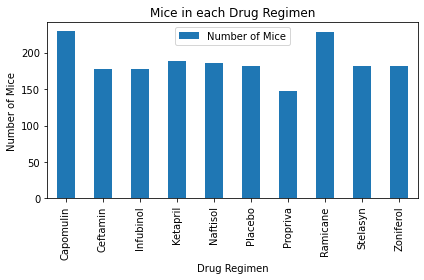

In [81]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# group the mice by drug from the cleaned data
mice = clean_df.groupby(["Drug Regimen"])

# grab the unique mice names
unique_mice = mice["Mouse ID"].unique()

# set series empty to append
mice_pd =[]

#  count the unique mice per drug regimen
for i in unique_mice:
    mice_pd.append(len(i))
    
# creat a datafram of unique mice per drug without duplicates for graphing
drug_mice = pd.DataFrame({"Drug Regimen":unique_mice.index,
                                "Number of Mice": mice["Mouse ID"].count()})

# set the index to the drug names to label the x axis
drug_mice.set_index("Drug Regimen", inplace = True)



# chart the data, give it a title, and label the axes
drug_chart = drug_mice.plot(kind="bar", title="Mice in each Drug Regimen")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Mice")

# improve the lay out
plt.tight_layout()



([<matplotlib.patches.Wedge at 0x7f9a4f5a9400>,
 [Text(-0.7176837777416649, -0.8336246128602807, 'Female'),
  Text(0.7176837777416649, 0.8336246128602806, 'Male')])

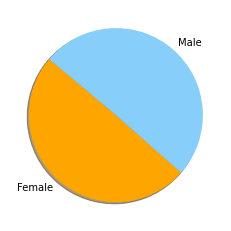

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



# group the mice by drug from the cleaned data
gender = clean_df.groupby(["Sex"])

# grab the unique mice names
unique_gender = gender["Mouse ID"].unique()

# set series empty to append
gender_pd =[]

#  count the unique mice per drug regimen
for i in unique_gender:
    gender_pd.append(len(i))
    
# create a datafram of unique mice per drug without duplicates for graphing
gender_mice = pd.DataFrame({"Gender":unique_gender.index,
                                "Number of Mice": gender_pd})


# Labels for the sections of our pie chart
labels = gender_mice["Gender"]

# The values of each section of the pie chart
sizes = gender_mice["Number of Mice"]

# The colors of each section of the pie chart
colors = ["orange","lightskyblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, shadow=True, startangle=140)

#gender_mice


Text(0, 0.5, 'Number of Mice by Gender')

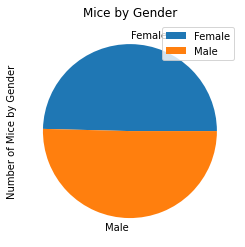

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# group the mice by drug from the cleaned data
gender = clean_df.groupby(["Sex"])

# grab the unique mice names
unique_gender = gender["Mouse ID"].unique()

# set series empty to append
gender_pd =[]

#  count the unique mice per drug regimen
for i in unique_gender:
    gender_pd.append(len(i))
    
# create a datafram of unique mice per drug without duplicates for graphing
gender_mice = pd.DataFrame({"Gender":unique_gender.index,
                                "Number of Mice": gender_pd})

# set the index to the drug names to label the x axis
gender_mice.set_index("Gender", inplace = True)

# plot the pie graph
gender_pie = gender_mice.plot(kind="pie",y='Number of Mice',title = ("Mice by Gender"))
gender_pie.set_ylabel("Number of Mice by Gender")



## Quartiles, Outliers and Boxplots

Capomulin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(*args, **kw)>

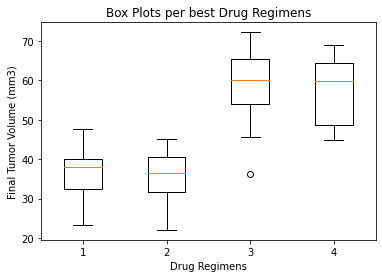

In [97]:

# set the drug regimens we want to look at
four_drugs = clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin") | (clean_df['Drug Regimen']== "Ramicane") | \
                  (clean_df['Drug Regimen'] == "Infubinol") | (clean_df['Drug Regimen']== "Ceftamin")] 

# create groupby
Id_group = clean_df.groupby(["Mouse ID"])

max_tp = Id_group["Timepoint"].max()

# merge drug regimens and last timepoints
drug_max = pd.merge(max_tp,four_drugs,on=["Mouse ID","Timepoint"],how="inner")

drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

tumor_vol=[]
test=[]

# loop to create data for graph and calculate stats
for i in drugs:
    drug_vol = drug_max.loc[drug_max['Drug Regimen']==i]['Tumor Volume (mm3)']
    tumor_vol.append(drug_vol)
    
    quartiles = drug_vol.quantile([0.25,0.5,0.75])
    low_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - low_q
    
    l_bound = low_q - (1.5*iqr)
    u_bound = upper_q * (1.5*iqr)
    
    print(f"{i} Outliers: {drug_vol.loc[(drug_vol<l_bound) | (drug_vol>u_bound)]}")
    

  
# graph

fig1, ax1 = plt.subplots() 
ax1.set_title('Box Plots per best Drug Regimens')
ax1.set_xlabel('Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show
 


## Line and Scatter Plots

Text(17.200000000000003, 0.5, 'Final Tumor Volume (mm3)')

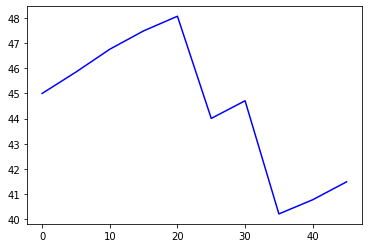

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# create lists for graph
tps = clean_df.loc[clean_df["Mouse ID"] == "l509", "Timepoint"]
tvs = clean_df.loc[clean_df["Mouse ID"] == "l509", "Tumor Volume (mm3)"]

# put lists in dataframe
single_mouse = pd.DataFrame({"Timepoint":tps,"Tumor Volume (mm3)":tvs})


# Plot line chart
mouse_line, = plt.plot(single_mouse["Timepoint"],single_mouse["Tumor Volume (mm3)"], color="blue", label="Mouse l509" )




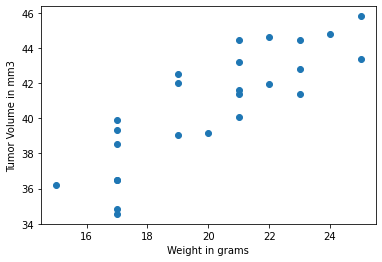

In [73]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


# seperate out the drug regimen we are looking for
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

# group by mouse
cap_mouse = cap_df.groupby(["Mouse ID"])

# calculate data for chart
t_num= cap_mouse["Weight (g)"].unique()
tum_avg = cap_mouse["Tumor Volume (mm3)"].mean()

# create dataframe
scat_df = pd.DataFrame({"Weight":t_num, "Tumor Vol":tum_avg}) 



#plot graph
x_values = scat_df.iloc[:,0]
y_values = scat_df.iloc[:,1]
plt.scatter(x_values,y_values)
plt.xlabel('Weight in grams')
plt.ylabel('Tumor Volume in mm3')
plt.show()


## Correlation and Regression

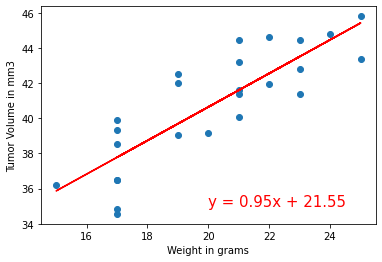

The correlation between mouse wight and the average tumor volume is 0.84


In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



plt.scatter(x_values,y_values)
plt.xlabel('Weight in grams')
plt.ylabel('Tumor Volume in mm3')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.show()
print(f'The correlation between mouse wight and the average tumor volume is {round(rvalue,2)}')
